In [5]:
#Libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

#Creating cities and roads

In [6]:
#Generating points (city coordinates)
def coordinates(ao_points):
    points = []
    for _ in range(ao_points):
        x = random.randint(-100, 100)
        y = random.randint(-100, 100)
        z = random.randint(0, 50)
        points.append((x, y, z))
    return points

points = coordinates(5)

In [7]:
import math
import random

# Function to calculate distances between two points
def distances(point1, point2):
    distances = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 + (point1[2] - point2[2])**2)
    if point1[2] < point2[2]:
        distances *= 1.1
    else:
        distances *= 0.9
    return distances

# Function to generate the distance matrix
def generate_distance_matrix(points):
    num_points = len(points)
    distance_matrix = [[0] * num_points for _ in range(num_points)]

    while True:
      for i in range(num_points):
        for j in range(i+1, num_points):
          if random.random() < 0.2 and distance_matrix[i][j] != -1:
            distance_matrix[i][j] = -1
            distance_matrix[j][i] = -1

      if all(any(val > 0 for val in row) for row in distance_matrix):
        return distance_matrix

      else:
        distance_matrix = [[0] * num_points for _ in range(num_points)]
        for i in range(num_points):
          for j in range(num_points):
            distance_matrix[i][j] = distances(points[i], points[j])

distance_matrix = generate_distance_matrix(points)

The value of $-1$ in the distance matrix means that it is impossible to travel, it appears with a probability of $0.2$. The above code also implements a workaround for $-1$ appearing in the entire line (which creates a city without any roads). If $z_i > z_j$ then the route from city $j$ to city $i$ is considered an uphill route and the cost of such a route increases. At the same time, the cost of the route from city $i$ to city $j$ decreases.

In [8]:
# Function to print the matrix
def print_matrix(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            print(f"distance from {i} to {j}: {matrix[i][j]}")
        print()

print_matrix(distance_matrix)

distance from 0 to 0: 0.0
distance from 0 to 1: 130.21416973586247
distance from 0 to 2: -1
distance from 0 to 3: 191.7694709801328
distance from 0 to 4: -1

distance from 1 to 0: 106.53886614752383
distance from 1 to 1: 0.0
distance from 1 to 2: 136.2155277492254
distance from 1 to 3: 59.18141600198494
distance from 1 to 4: 128.16707845620888

distance from 2 to 0: -1
distance from 2 to 1: 166.48564502683107
distance from 2 to 2: 0.0
distance from 2 to 3: 231.12306245807665
distance from 2 to 4: 23.152321697834108

distance from 3 to 0: 156.90229443829048
distance from 3 to 1: 72.33284178020382
distance from 3 to 2: 189.10068746569908
distance from 3 to 3: 0.0
distance from 3 to 4: 181.3360416464416

distance from 4 to 0: -1
distance from 4 to 1: 156.64865144647752
distance from 4 to 2: 18.94280866186427
distance from 4 to 3: 221.6329397900953
distance from 4 to 4: 0.0



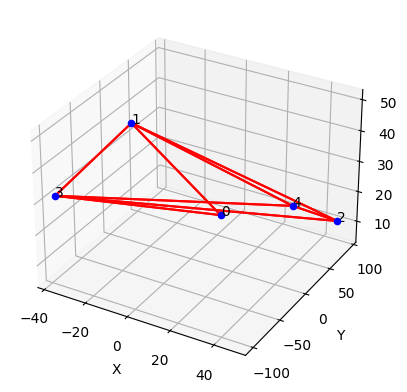

In [9]:
def plot_graph(points, distance_matrix):
    num_points = len(points)
    x, y, z = np.array(points).T

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(num_points): # Cities
        ax.scatter(x[i], y[i], z[i], color='b')
        ax.text(x[i], y[i], z[i], str(i), color='black')

    for i in range(num_points): # Roads
        for j in range(num_points):
            if distance_matrix[i][j] > 0:
                ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], color='r')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

plot_graph(points, distance_matrix)

Graphical interpretation of the distance matrix taking into account all available connections (we exclude routes for which the value in the matrix is ​​$-1$)